In [1]:
import gzip
import pandas as pd

file_path = "C:\\Users\\juana\\OneDrive\\Escritorio\\ML_NFL\\ngs_2022_receiving.csv.gz"

# Abre el archivo comprimido en modo lectura utilizando gzip
with gzip.open(file_path, "rt") as file:
    # Lee el archivo utilizando pandas
    df_ngs = pd.read_csv(file)

# Ahora puedes trabajar con el dataframe df
print(df_ngs.head())

   season season_type  week player_display_name player_position team_abbr  \
0    2022         REG     0       Tyler Lockett              WR       SEA   
1    2022         REG     0       Rondale Moore              WR       ARI   
2    2022         REG     0         Greg Dortch              WR       ARI   
3    2022         REG     0       Ben Skowronek              WR       LAR   
4    2022         REG     0         Chris Olave              WR        NO   

   avg_cushion  avg_separation  avg_intended_air_yards  \
0     7.530091        3.543786               10.939915   
1     7.497959        3.828381                5.271071   
2     7.302167        4.227483                4.441562   
3     7.234894        3.378927                7.499180   
4     7.224000        2.734038               14.181849   

   percent_share_of_intended_air_yards  ...   yards  rec_touchdowns   avg_yac  \
0                            29.015183  ...  1033.0               9  3.368571   
1                         

In [2]:
df_ngs

,season,season_type,week,player_display_name,player_position,team_abbr,avg_cushion,avg_separation,avg_intended_air_yards,percent_share_of_intended_air_yards,...,yards,rec_touchdowns,avg_yac,avg_expected_yac,avg_yac_above_expectation,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
0,2022,REG,0,Tyler Lockett,WR,SEA,7.530091,3.543786,10.939915,29.015183,...,1033.0,9,3.368571,4.229634,-0.861062,00-0032211,Tyler,Lockett,16,T.Lockett
1,2022,REG,0,Rondale Moore,WR,ARI,7.497959,3.828381,5.271071,6.781694,...,414.0,1,7.124390,5.373338,1.751052,00-0036936,Rondale,Moore,4,R.Moore
2,2022,REG,0,Greg Dortch,WR,ARI,7.302167,4.227483,4.441562,6.530809,...,467.0,2,6.070000,4.930360,1.139640,00-0035500,Greg,Dortch,83,G.Dortch
3,2022,REG,0,Ben Skowronek,WR,LAR,7.234894,3.378927,7.499180,12.690024,...,376.0,0,3.966923,4.089148,-0.122225,00-0036862,Ben,Skowronek,18,B.Skowronek
4,2022,REG,0,Chris Olave,WR,NO,7.224000,2.734038,14.181849,38.613816,...,1042.0,4,2.971389,3.135672,-0.164283,00-0037239,Chris,Olave,12,C.Olave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,2022,POST,23,Travis Kelce,TE,KC,8.130000,4.758672,9.373333,38.038553,...,81.0,1,4.126667,5.998231,-1.871564,00-0030506,Travis,Kelce,87,T.Kelce
1462,2022,POST,23,Dallas Goedert,TE,PHI,7.188333,2.019201,7.165714,15.203225,...,60.0,0,2.105000,2.905969,-0.800969,00-0034351,Dallas,Goedert,88,D.Goedert
1463,2022,POST,23,JuJu Smith-Schuster,WR,KC,6.505714,3.367508,6.127778,37.301319,...,53.0,0,2.688571,4.654107,-1.965536,00-0033857,John,Smith-Schuster,9,J.Smith-Schuster
1464,2022,POST,23,DeVonta Smith,WR,PHI,4.393750,3.577102,12.021111,32.791804,...,100.0,0,6.317143,6.742514,-0.425371,00-0036912,DeVonta,Smith,6,D.Smith


In [3]:
data_sorted = df_ngs.sort_values('targets', ascending=False)

# Selecciona los 50 jugadores con el mayor número de targets
top_players = data_sorted.head(50)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [5]:
# Divide los datos en características (X) y variable objetivo (y)
X = top_players[['avg_cushion', 'avg_separation', 'avg_intended_air_yards']]
y = top_players['yards']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Crea una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


LinearRegression()

In [7]:
# Realiza predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Calcula el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

print("Error cuadrático medio:", mse)


Error cuadrático medio: 50598.952781891865


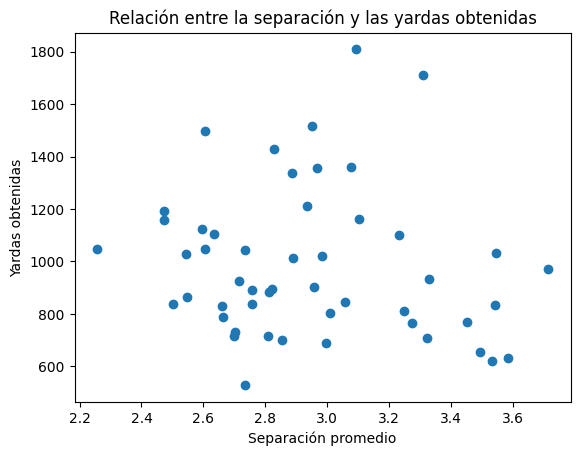

In [8]:
import matplotlib.pyplot as plt

# Graficar la separación promedio vs las yardas obtenidas
plt.scatter(top_players['avg_separation'], top_players['yards'])
plt.xlabel('Separación promedio')
plt.ylabel('Yardas obtenidas')
plt.title('Relación entre la separación y las yardas obtenidas')
plt.show()


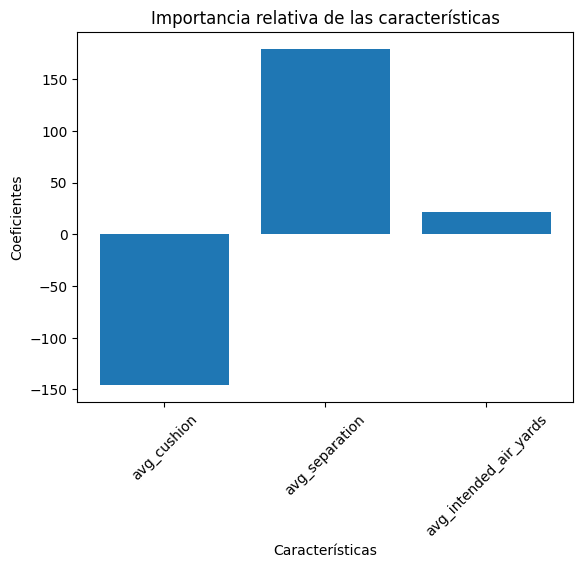

In [9]:
# Obtener los coeficientes del modelo
coefficients = model.coef_

# Crear un gráfico de barras para visualizar los coeficientes
plt.bar(X.columns, coefficients)
plt.xlabel('Características')
plt.ylabel('Coeficientes')
plt.title('Importancia relativa de las características')
plt.xticks(rotation=45)
plt.show()


c:\Users\juana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\juana\AppData\Local\Temp\ipykernel_3300\3581324794.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_players['cluster'] = cluster_labels


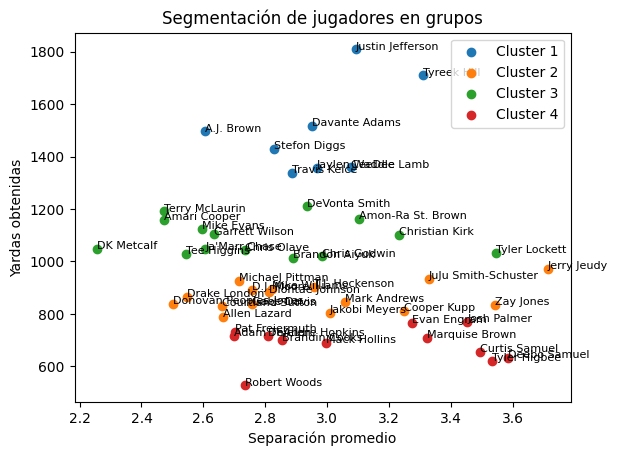

In [10]:
from sklearn.cluster import KMeans

# Seleccionar las características relevantes para el clustering
features = ['avg_separation', 'yards', 'avg_cushion']

# Obtener los datos de los jugadores para las características seleccionadas
player_data = top_players[features].values

# Definir el número de clusters
num_clusters = 4

# Aplicar el algoritmo K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(player_data)

# Obtener las etiquetas de cluster asignadas a cada jugador
cluster_labels = kmeans.labels_

# Agregar la columna de etiquetas al DataFrame de los jugadores
top_players['cluster'] = cluster_labels

# Visualizar los grupos con los nombres de los jugadores
for cluster in range(num_clusters):
    cluster_players = top_players[top_players['cluster'] == cluster]
    plt.scatter(cluster_players['avg_separation'], cluster_players['yards'], label=f'Cluster {cluster + 1}')
    for i in range(len(cluster_players)):
        plt.text(cluster_players['avg_separation'].iloc[i], cluster_players['yards'].iloc[i], cluster_players['player_display_name'].iloc[i], fontsize=8)
    
plt.xlabel('Separación promedio')
plt.ylabel('Yardas obtenidas')
plt.title('Segmentación de jugadores en grupos')
plt.legend()
plt.show()
